# Housing Price & Real Estate - 2023

DATA SET:

Home prices are expected to rise for some time due to increased demand and limited supply. Millennials are at the age to start investing in the real estate market for the first time. Hence, the demand for residential and commercial projects is rising with every passing day. The future of real estate will witness a rise in demand and limited supply, resulting in it being a seller’s market.

Address:Address of the selling house
Price:Housing price
Description: Location Description
Place:Location
Beds:Number of Beds
Baths: Number of bathrooms
Sq.Ft:Square feet

Objective: to assist individuals in making well-informed decisions in order to buy or sell a home.

# Data Collecting

In [112]:
import pandas as pd
import numpy as np
#changed file name as it contains spaces

#importing the data
df=pd.read_excel("Homes for Sale and Real Estate.xlsx")
first_five_rows=df.head();
print(first_five_rows);


                        Address   Price     Description         Place  Beds  \
0                 3704 42 St SW  979999  CA  AB T3E 3N1     Glenbrook     4   
1      30 Mahogany Mews SE #415  439900  CA  AB T3M 3H4      Mahogany     2   
2      273 Auburn Shores Way SE  950000  CA  AB T3M 2E9    Auburn Bay     4   
3            235 15 Ave SW #404  280000  CA  AB T2R 0P6      Beltline     2   
4  24 Hemlock Crescent SW #2308  649000  CA  AB T3C 2Z1  Spruce Cliff     2   

   Bath  Sq.Ft                        Website  
0   3.5   1813        Century 21 Bravo Realty  
1   2.0   1029  Century 21 Bamber Realty Ltd.  
2   2.5   2545                     Exp Realty  
3   2.0    898    RE/MAX Realty Professionals  
4   2.0   1482                        Charles  


# Data Cleaning

In [113]:
#dealing with missing values(drop or replace with avg/mode/median/mean or leave)
find_null=df.isnull()# contains any null values,it stores as true
print(find_null.sum()) #suming the missing values to check how many are there

Address         0
Price           0
Description     0
Place          16
Beds            0
Bath            0
Sq.Ft           0
Website         1
dtype: int64


In [114]:
# we cannot delete missing values as it is not complete row. so, replace it with repeatative values.
# find mode
modeP=df['Place'].mode().iloc[0]
modeW=df['Website'].mode().iloc[0]
# Replace null values in the 'Place'/'WEBSITE' column with the mode
df['Place']=df['Place'].fillna(modeP)
df['Website']=df['Website'].fillna(modeW)

# Check for null values after replacement
print("\nNull values after replacement:")
print(df["Place"]) #Null values after replacement:0

#duplicate data - no duplicates
print(df.duplicated())

#remove whitespaces
print(df.columns)
for column in df.columns:
    df['Description']=df['Description'].str.replace('  ',' ')
    df['Website']=df['Website'].str.replace('  ',' ')

print(df.head())


Null values after replacement:
0          Glenbrook
1           Mahogany
2         Auburn Bay
3           Beltline
4       Spruce Cliff
            ...     
3355     Tuxedo Park
3356        Beltline
3357       Sage Hill
3358      Eau Claire
3359      Shaganappi
Name: Place, Length: 3360, dtype: object
0       False
1       False
2       False
3       False
4       False
        ...  
3355    False
3356    False
3357    False
3358    False
3359    False
Length: 3360, dtype: bool
Index(['Address', 'Price', 'Description', 'Place', 'Beds', 'Bath', 'Sq.Ft',
       'Website'],
      dtype='object')
                        Address   Price    Description         Place  Beds  \
0                 3704 42 St SW  979999  CA AB T3E 3N1     Glenbrook     4   
1      30 Mahogany Mews SE #415  439900  CA AB T3M 3H4      Mahogany     2   
2      273 Auburn Shores Way SE  950000  CA AB T3M 2E9    Auburn Bay     4   
3            235 15 Ave SW #404  280000  CA AB T2R 0P6      Beltline     2   
4  24 Hem

In [61]:
df['Website'].unique()

array(['Century 21 Bravo Realty', 'Century 21 Bamber Realty Ltd.',
       'Exp Realty', 'RE/MAX Realty Professionals', 'Charles',
       'Babych Group Central', 'Diamond Realty & Associates Ltd.',
       'Century 21 Elevate Real Estate', 'RE/MAX Real Estate (Central)',
       'Royal Lepage Benchmark', 'Cir Realty',
       'Listed by Mariangela Avila', 'RE/MAX House Of Real Estate',
       'RE/MAX Landan Real Estate', 'Seller Direct Real Estate',
       'Maxwell Central', 'Real Estate Professionals Inc.',
       'First Place Realty', 'Real Broker', 'Exa Realty',
       'RE/MAX Irealty Innovations', 'Bode Platform Inc.',
       'D Gees Realty Inc.', 'Streetwise Realty',
       'Maxwell Capital Realty', 'Century 21 Powerrealty.Ca',
       'Royal Lepage Mission Real Estate', 'Grand Realty',
       'Coldwell Banker Mountain Central',
       'Ymk Real Estate & Management Inc.', 'RE/MAX Complete Realty',
       'Listed by Jacqueline Ulch', 'RE/MAX Real Estate (Mountain View)',
       '2% Real

In [115]:
# though bath is float , it has some inconsistent values i.e., add decimal values to real numbers
df['Bath']=df['Bath'].round(1)

# Data Analysis

In [116]:
#to know to summary of data:
print("\nSummary statistics:")
print(df.describe())

# Data types of columns
print("\nData types of columns:")
print(df.dtypes)

# Missing values
print("\nMissing values:")
print(df.isnull().sum())
#display 5 rows
print(df.head())


Summary statistics:
              Price         Beds         Bath         Sq.Ft
count  3.360000e+03  3360.000000  3360.000000   3360.000000
mean   7.500648e+05     3.125000     2.479167   1558.815179
std    6.447619e+05     1.349087     1.023546   1056.424307
min    1.419000e+05     1.000000     1.000000    307.000000
25%    3.990000e+05     2.000000     2.000000    933.000000
50%    6.199000e+05     3.000000     2.500000   1352.000000
75%    8.499220e+05     4.000000     3.500000   2023.250000
max    1.000000e+07    10.000000     8.000000  39654.000000

Data types of columns:
Address         object
Price            int64
Description     object
Place           object
Beds             int64
Bath           float64
Sq.Ft            int64
Website         object
dtype: object

Missing values:
Address        0
Price          0
Description    0
Place          0
Beds           0
Bath           0
Sq.Ft          0
Website        0
dtype: int64
                        Address   Price    Descript

Observations: We could see mean value is greater than median for Price, Bed, Sq.ft. that means, we have outliers

In [117]:
numerical_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

          Price      Beds      Bath     Sq.Ft
Price  1.000000  0.428220  0.578574  0.618504
Beds   0.428220  1.000000  0.754536  0.501651
Bath   0.578574  0.754536  1.000000  0.621736
Sq.Ft  0.618504  0.501651  0.621736  1.000000


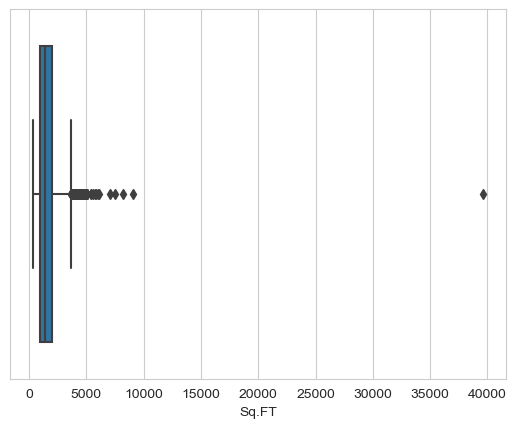

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

#box plot
sns.set_style("whitegrid") 
sns.boxplot(x = 'Sq.Ft', data = df) 
plt.xlabel('Sq.FT')
plt.show()

In [119]:
first_quartiles= df['Sq.Ft'].quantile(.25)
third_quartiles=df['Sq.Ft'].quantile(.75)
IQRs=third_quartiles-first_quartiles

In [120]:
new_boundarys=third_quartiles + 3*IQRs

In [121]:
df.drop(df[df['Sq.Ft']>new_boundarys].index,axis=0,inplace=True)

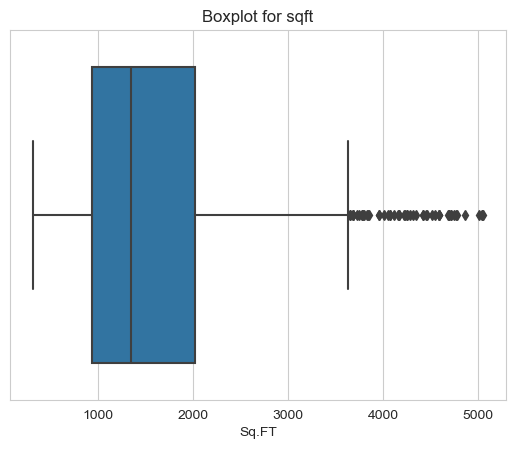

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

#box plot
sns.set_style("whitegrid") 
sns.boxplot(x = 'Sq.Ft', data = df) 
plt.xlabel('Sq.FT')
plt.title('Boxplot for sqft')
plt.show()

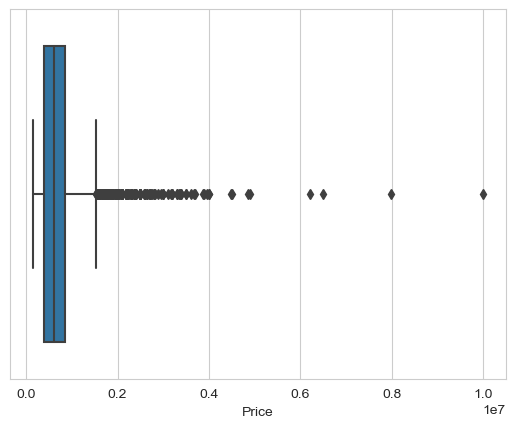

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

#box plot
sns.set_style("whitegrid") 
sns.boxplot(x = 'Price', data = df) 
plt.xlabel('Price')
plt.show()

In [41]:
df.shape

(3348, 8)

In [124]:
first_quartile= df['Price'].quantile(.25)
third_quartile=df['Price'].quantile(.75)
IQR=third_quartile-first_quartile

In [125]:
new_boundary=third_quartile + 3*IQR# As we cannot drop all the points after right whisker

In [126]:
df.drop(df[df['Price']>new_boundary].index,axis=0,inplace=True)

In [45]:
df.shape

(3269, 8)

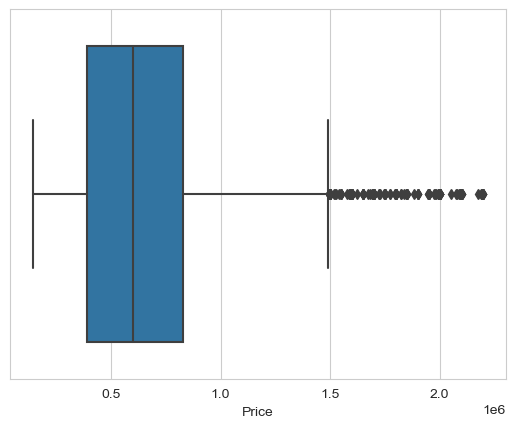

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

#box plot
sns.set_style("whitegrid") 
sns.boxplot(x = 'Price', data = df) 
plt.xlabel('Price')
plt.show()

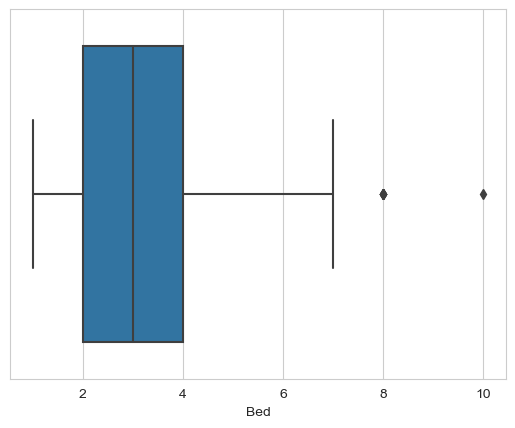

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

#box plot
sns.set_style("whitegrid") 
sns.boxplot(x = 'Beds', data = df) 
plt.xlabel('Bed')
plt.show()

In [59]:
import scipy.stats as stats
# Select only numerical columns
numerical_columns = df.select_dtypes(include=np.number)

# Calculate z-scores for each numerical column separately
z_scores = stats.zscore(numerical_columns)

# Define threshold for outlier detection
threshold = 3

# Create a boolean mask to identify outliers
outlier_mask = (np.abs(z_scores) < threshold).all(axis=1)

# Filter out rows with outliers
df_no_outliers = df[outlier_mask]


In [128]:
numerical_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

          Price      Beds      Bath     Sq.Ft
Price  1.000000  0.578834  0.697725  0.810786
Beds   0.578834  1.000000  0.755178  0.657313
Bath   0.697725  0.755178  1.000000  0.781269
Sq.Ft  0.810786  0.657313  0.781269  1.000000


# Data Modelling

In [129]:
#Prepare the data by splitting it into Training and Test set
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
X = df[['Sq.Ft']]
y = df[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



A linear regression alogrithm is a supervised learning algorithm predicts the relation between two variables by assuming linear relationship between a dependent variable or one or more independent variables.
the goal is to find the best fitting line that minimizes the errors between the predicted and actual values.

In [130]:
#Plot the regression line
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [131]:
result=reg.predict(X_test)
print(result)

[[ 399612.07678211]
 [ 459001.42450642]
 [ 217171.41866496]
 [ 268015.53650089]
 [ 613670.08548629]
 [ 811492.15740254]
 [ 294933.01064932]
 [ 732876.04242934]
 [ 632469.59124075]
 [ 590170.70329322]
 [ 549153.59982894]
 [1047767.76381654]
 [ 494464.12854324]
 [ 890535.53387015]
 [ 309887.162954  ]
 [ 788847.2981983 ]
 [ 375258.17160019]
 [ 365858.41872296]
 [1132792.80120603]
 [1318224.28978411]
 [ 221016.77211474]
 [ 692286.20045949]
 [ 719630.93610234]
 [ 828582.61717932]
 [ 442338.22622406]
 [ 348767.95894618]
 [ 287242.30374977]
 [ 887117.4419148 ]
 [ 562398.70615595]
 [1649351.94795925]
 [1019568.50518485]
 [1213972.48514574]
 [ 854218.30684449]
 [ 526508.74062471]
 [ 279551.59685022]
 [1392995.05130753]
 [ 764493.39301639]
 [ 801237.88153647]
 [ 506000.18889257]
 [ 786283.72923178]
 [ 459001.42450642]
 [ 910616.82410787]
 [ 487200.68313811]
 [ 266733.75201763]
 [1052467.64025516]
 [1121256.7408567 ]
 [ 508563.75785909]
 [1074685.23796497]
 [ 318005.13134797]
 [ 486346.16014927]


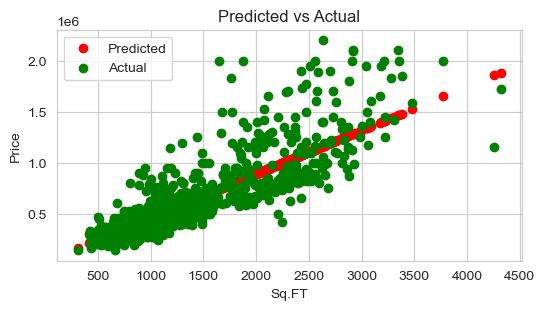

In [132]:
plt.figure(figsize=(6, 3))
plt.scatter(X_test.values.flatten(), reg.predict(X_test).flatten(), color='red', label='Predicted')
plt.scatter(X_test.values.flatten(), y_test.values.flatten(), color='green', label='Actual')
plt.xlabel('Sq.FT')
plt.ylabel('Price')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()

In [133]:
y_predicted=reg.predict(X_test)

In [134]:
import numpy as np
# Flatten the arrays
y_test_flat = y_test.values.flatten()
y_predicted_flat = y_predicted.flatten()
difference_values = (y_test - y_predicted).values.flatten()

# Create DataFrame
data_after_prediction = pd.DataFrame({
    "Actual_values": y_test_flat,
    "Predicted_values": y_predicted_flat,
    "Difference_values": difference_values
})

print(data_after_prediction)


     Actual_values  Predicted_values  Difference_values
0           549900     399612.076782      150287.923218
1           299900     459001.424506     -159101.424506
2           299999     217171.418665       82827.581335
3           289900     268015.536501       21884.463499
4           699900     613670.085486       86229.914514
..             ...               ...                ...
649         679900     660668.849872       19231.150128
650         579000     564962.275122       14037.724878
651         598000     753811.855656     -155811.855656
652         699900     689722.631493       10177.368507
653         699900     517536.249242      182363.750758

[654 rows x 3 columns]


In [135]:
#Predict accuracy using r2square
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
r2 = r2_score(y_test, y_predicted)
print(r2)

0.6643725009882324


Model Fit: A higher r2 value indicates a better fit of the model to the data. An r2 value of 0.6 suggests that the model is reasonably effective in explaining the observed variation in the dependent variable, but there is still room for improvement

In [136]:
#Predict the price of house if it has sq ft of house is 2545
r_sqft = 2545
predicted_price = reg.predict([[r_sqft]])
print(predicted_price)

[[1123393.0483288]]


C:\Users\kathy\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [137]:
#Evaluate the model: Calculate Mean absolute error, mean squared error, root mean
#squared error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean = mean_absolute_error(y_test,y_predicted)
print(mean)
mse= mean_squared_error(y_test,y_predicted)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

164400.98524818072
55586718740.44248
235768.35822570103


C:\Users\kathy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


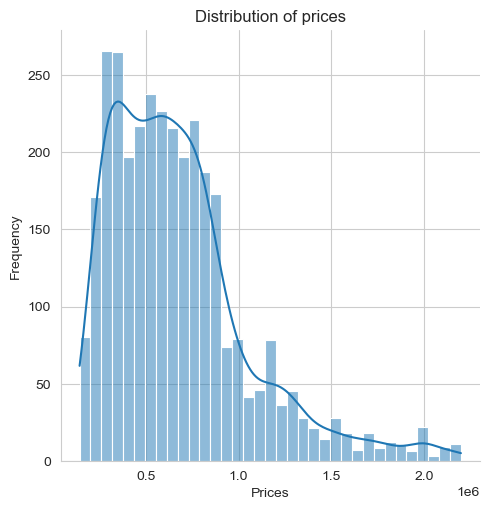

In [132]:
#Import seaborn and plot the distribution as well

sns.displot(df['Price'], kde=True)
plt.title('Distribution of prices')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.show()


In [133]:
#Print actual vs predicted percentage score

df1=pd.DataFrame(df,columns=['Price','Sq.Ft'])
df1
reg.fit(X_train, y_train)
pre = reg.predict(X_test)
print(pre)


[[ 399612.07678211]
 [ 459001.42450642]
 [ 217171.41866496]
 [ 268015.53650089]
 [ 613670.08548629]
 [ 811492.15740254]
 [ 294933.01064932]
 [ 732876.04242934]
 [ 632469.59124075]
 [ 590170.70329322]
 [ 549153.59982894]
 [1047767.76381654]
 [ 494464.12854324]
 [ 890535.53387015]
 [ 309887.162954  ]
 [ 788847.2981983 ]
 [ 375258.17160019]
 [ 365858.41872296]
 [1132792.80120603]
 [1318224.28978411]
 [ 221016.77211474]
 [ 692286.20045949]
 [ 719630.93610234]
 [ 828582.61717932]
 [ 442338.22622406]
 [ 348767.95894618]
 [ 287242.30374977]
 [ 887117.4419148 ]
 [ 562398.70615595]
 [1649351.94795925]
 [1019568.50518485]
 [1213972.48514574]
 [ 854218.30684449]
 [ 526508.74062471]
 [ 279551.59685022]
 [1392995.05130753]
 [ 764493.39301639]
 [ 801237.88153647]
 [ 506000.18889257]
 [ 786283.72923178]
 [ 459001.42450642]
 [ 910616.82410787]
 [ 487200.68313811]
 [ 266733.75201763]
 [1052467.64025516]
 [1121256.7408567 ]
 [ 508563.75785909]
 [1074685.23796497]
 [ 318005.13134797]
 [ 486346.16014927]


In [134]:
print(X_test)

      Sq.Ft
2776    851
1538    990
2412    424
659     543
2027   1352
...     ...
3350   1462
40     1238
3131   1680
1511   1530
457    1127

[654 rows x 1 columns]


In [141]:
#Apply ridge and grid search to improvise your model
ridge_regressor = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

print("\nBest Alpha:", ridge_regressor.best_params_)
print("Best Score:", ridge_regressor.best_score_)

# Predict the price of a house using the best Ridge regression model
best_ridge_model = ridge_regressor.best_estimator_
predicted_price = best_ridge_model.predict([[2545]])  # Assuming 2545 sqft, find price of the house
print("Predicted price of the house using Ridge regression:", predicted_price[0])


Best Alpha: {'alpha': 20}
Best Score: -47788229898.25207
Predicted price of the house using Ridge regression: [1123393.04130826]


C:\Users\kathy\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


# Data Visualizations

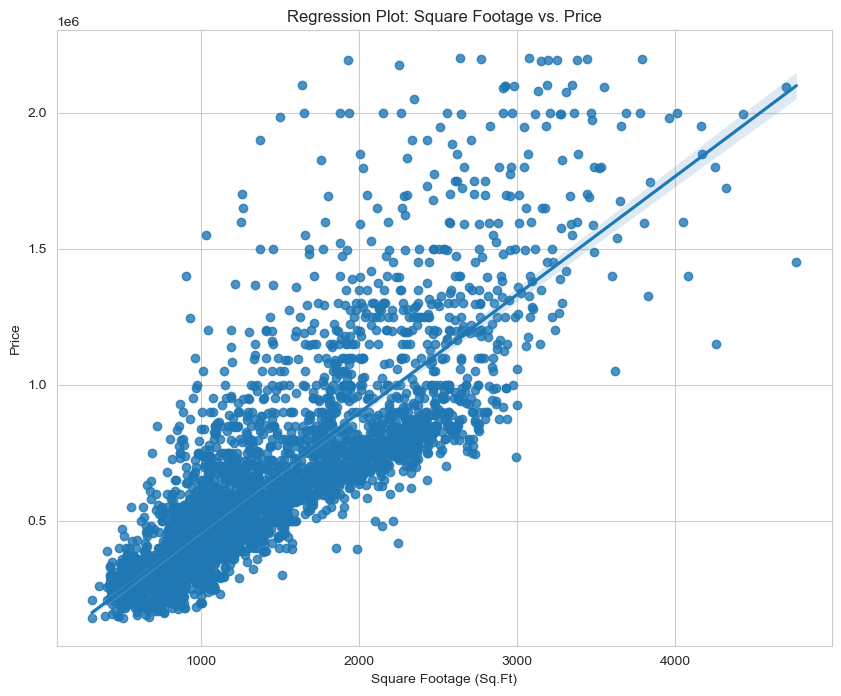

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 8))
sns.regplot(x='Sq.Ft', y='Price', data=df)
plt.xlabel('Square Footage (Sq.Ft)')
plt.ylabel('Price')
plt.title('Regression Plot: Square Footage vs. Price')
plt.grid(True)
plt.show()

In [82]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )
df.head()

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website,Price-binned
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty,Medium
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.,Low
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty,Medium
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals,Low
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles,Low


Text(0.5, 1.0, 'Price bins')

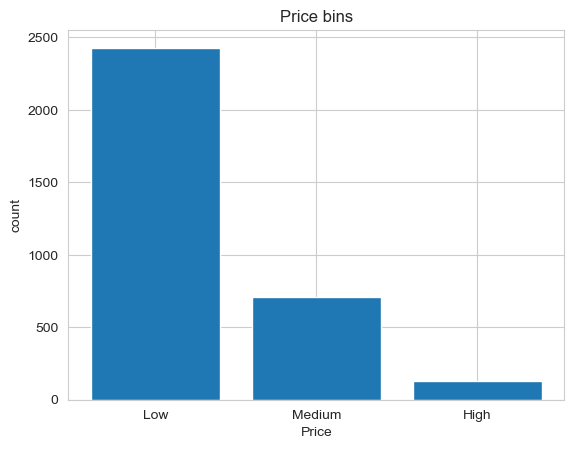

In [83]:
#Use a histogram to visualize the distribution of bins we created above.
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Price-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins") 

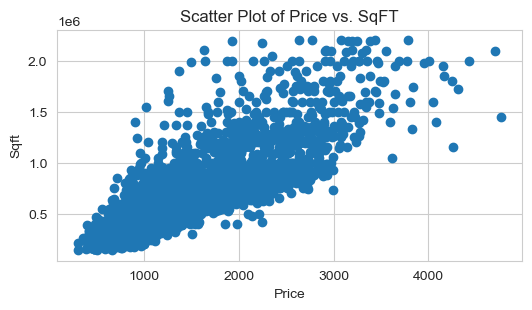

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(df['Sq.Ft'], df['Price'], alpha=1.0)
plt.title('Scatter Plot of Price vs. SqFT')
plt.xlabel('Price')
plt.ylabel('Sqft')
plt.show()

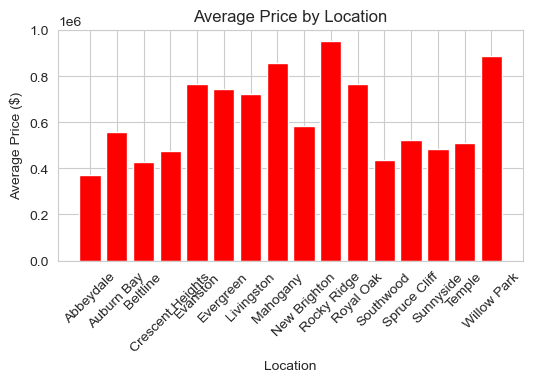

In [84]:
import matplotlib.pyplot as plt

#bar chart to calculate Average Price by Location

selected_places = df['Place'][1:20]
filtered_df = df[df['Place'].isin(selected_places)]

# Calculate the average price for each place
average_price = filtered_df.groupby('Place')['Price'].mean()

# Extract places for plotting
places = average_price.index

# Create bar chart
plt.figure(figsize=(6, 3))
plt.bar(places, average_price, color='Red')
plt.xlabel('Location')
plt.ylabel('Average Price ($)')
plt.title('Average Price by Location')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

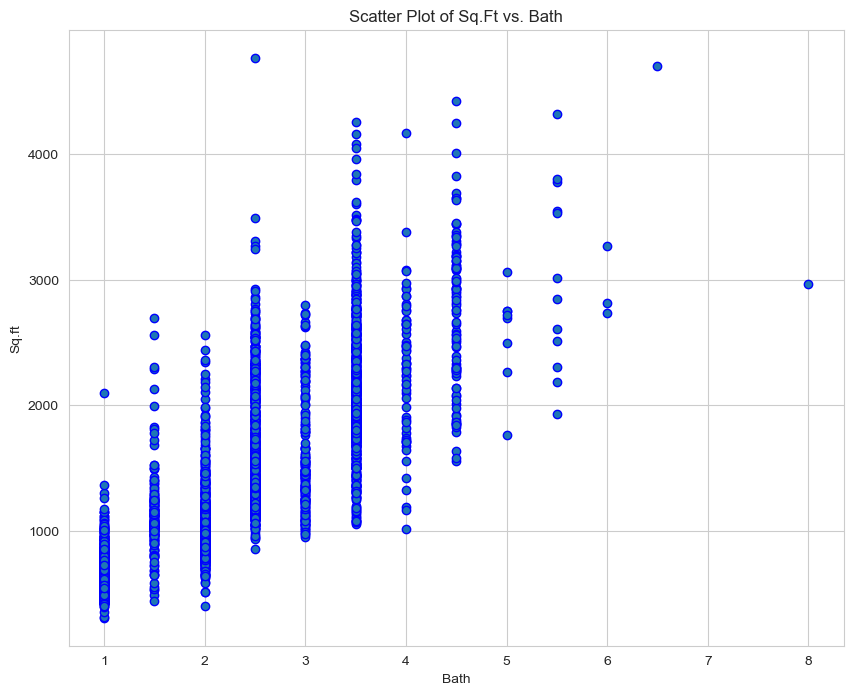

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['Bath'],df['Sq.Ft'],edgecolors='Blue' , alpha=1.0)
plt.title('Scatter Plot of Sq.Ft vs. Bath')
plt.xlabel('Bath')
plt.ylabel('Sq.ft')
plt.show()

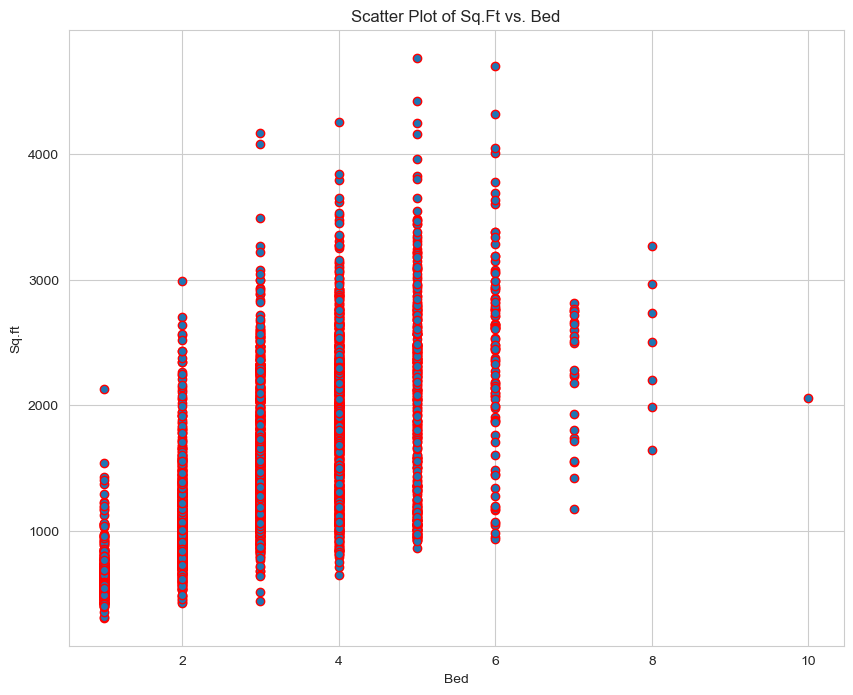

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['Beds'],df['Sq.Ft'],edgecolors='Red' , alpha=1.0)
plt.title('Scatter Plot of Sq.Ft vs. Bed')
plt.xlabel('Bed')
plt.ylabel('Sq.ft')
plt.show()

In [34]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
              Price         Beds         Bath         Sq.Ft
count  3.270000e+03  3270.000000  3270.000000   3270.000000
mean   6.751688e+05     3.091131     2.433945   1498.199694
std    3.793804e+05     1.331874     0.969910    972.487337
min    1.419000e+05     1.000000     1.000000    307.000000
25%    3.899000e+05     2.000000     2.000000    923.250000
50%    5.999995e+05     3.000000     2.500000   1324.500000
75%    8.300000e+05     4.000000     3.500000   1964.000000
max    2.199900e+06    10.000000     8.000000  39654.000000


In [25]:
df.to_excel('Homes for Sale and Real Estate.xlsx',index=False)

In [10]:
df.to_csv('Homes for Sale and Real Estate.csv',index=False)